In [1]:
import matplotlib.cm as cm
import networkx as nx
import numpy as np
import osmnx as ox
import pandas as pd
import geopandas as gpd
import math

%matplotlib inline
ox.__version__

'1.0.1'

# 单数据测试

In [2]:
file_path = "Data/data.geojson"

In [3]:
gdf = gpd.read_file(file_path)
gdf = gdf.to_crs("EPSG:4326") 

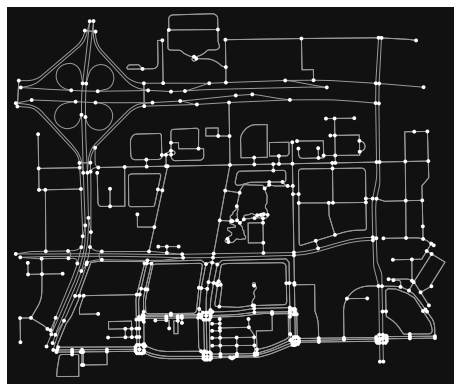

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
"""用polygon爬取"""
G = ox.graph_from_polygon(gdf['geometry'][0], network_type='all',simplify=True, clean_periphery=True)
ox.plot_graph(G)

In [5]:
ox.save_graph_shapefile(G, filepath='./data/piedmont')

In [2]:
area = math.pi * 1098*1098

In [6]:
G_proj = ox.project_graph(G)
G2 = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=20, dead_ends=False)

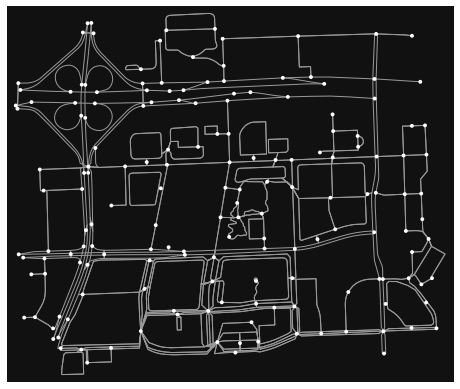

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [7]:
ox.plot_graph(G2)

In [8]:
ox.save_graph_shapefile(G2, filepath='./data/piedmont2')

In [10]:
stats = ox.basic_stats(G2,area)

In [12]:
sc = []
sc.append({"intersection_density":round(stats["intersection_density_km"],2),
      "street_density":round(stats["street_density_km"],2),
      "link_node_radio":round(stats["streets_per_node_avg"],2)})

In [13]:
sc

[{'intersection_density': 34.32,
  'street_density': 20081.52,
  'link_node_radio': 1.84}]

# 测试代码

In [62]:
file_path = "/Users/creative/Documents/python/osmnx/overpass/state_border_saxony.xml"

In [63]:
G = ox.graph_from_xml(file_path,simplify=True)

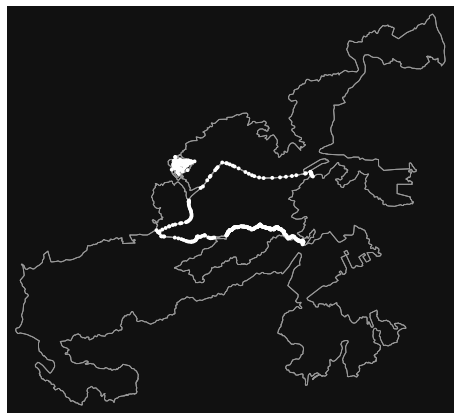

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [64]:
ox.plot_graph(G)

In [65]:
G_proj = ox.project_graph(G)
G2 = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=20, dead_ends=False)
stats = ox.basic_stats(G2)

In [66]:
stats

{'n': 103,
 'm': 430,
 'k_avg': 8.349514563106796,
 'intersection_count': 103,
 'streets_per_node_avg': 4.174757281553398,
 'streets_per_node_counts': {0: 0, 1: 0, 2: 2, 3: 0, 4: 90, 5: 0, 6: 11},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.0,
  2: 0.019417475728155338,
  3: 0.0,
  4: 0.8737864077669902,
  5: 0.0,
  6: 0.10679611650485436},
 'edge_length_total': 345214.8002742744,
 'edge_length_avg': 802.8251169169173,
 'street_length_total': 172607.40013713742,
 'street_length_avg': 802.8251169169182,
 'street_segments_count': 215,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 0.0001019373420003588,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

# 计算代码

# 2021年数据计算

In [3]:
file_path = "D:\\2020 毕业论文\\中期检查\\Database\\07-connectivity\\Result\\buff_1098.shp"
gdf = gpd.read_file(file_path)
gdf = gdf.to_crs("EPSG:4326") 

In [4]:
def SC(geo_boundary,park):
    area = math.pi * 1098*1098
    G = ox.graph_from_polygon(geo_boundary, network_type='all')
    G_proj = ox.project_graph(G)
    G2 = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=15, dead_ends=False) #简化路网
    stats = ox.basic_stats(G2, area=area)
    return {"park":park,"intersection_density":round(stats["intersection_density_km"],2),
          "street_density":round(stats["street_density_km"],2),
          "link_node_radio":round(stats["streets_per_node_avg"],2)}

In [7]:
from tqdm import tqdm

sc = []
for i in tqdm(range(244,len(gdf))):
    park = gdf.loc[i,"公园名"]
    geo_boundary = gdf.loc[i,"geometry"]
    sc.append(SC(geo_boundary,park))

100%|██████████| 128/128 [14:18<00:00,  6.71s/it]


In [8]:
sc

[{'park': '衙边社区公园',
  'intersection_density': 6.6,
  'street_density': 4763.78,
  'link_node_radio': 1.81},
 {'park': '沙一公园',
  'intersection_density': 11.88,
  'street_density': 7055.69,
  'link_node_radio': 1.92},
 {'park': '东塘社区公园',
  'intersection_density': 9.5,
  'street_density': 5871.11,
  'link_node_radio': 2.07},
 {'park': '坣岗社区公园',
  'intersection_density': 10.3,
  'street_density': 5206.96,
  'link_node_radio': 2.16},
 {'park': '新桥社区公园',
  'intersection_density': 17.95,
  'street_density': 6783.82,
  'link_node_radio': 2.51},
 {'park': '燕川燕岭社区公园',
  'intersection_density': 6.07,
  'street_density': 3266.41,
  'link_node_radio': 2.89},
 {'park': '罗田社区公园',
  'intersection_density': 3.96,
  'street_density': 3705.31,
  'link_node_radio': 2.0},
 {'park': '东方社区公园',
  'intersection_density': 6.6,
  'street_density': 4981.57,
  'link_node_radio': 1.98},
 {'park': '花果山村',
  'intersection_density': 20.33,
  'street_density': 8079.43,
  'link_node_radio': 2.35},
 {'park': '东风公园',
  'i

In [23]:
len(data)

244

In [9]:
df = pd.DataFrame(columns=["park","intersection_density","street_density","link_node_radio"])  #构建一个空表
df = df.append(sc,ignore_index=True)
df.to_excel("SC_result20212.xlsx") 

# 历史数据计算

In [56]:
df["street_density"] = df["street_density"]/1000

In [58]:
df.to_excel("SC_result2021.xlsx") 